# Initial Setup

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = 'DatasetOfRacesGender/train'
valid_path = 'DatasetOfRacesGender/valid'
test_path = 'DatasetOfRacesGender/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale', 'AsianMale', 'AsianFemale', 'CaucasianMale', 'CaucasianFemale', 'HispanicMale', 'HispanicFemale'], batch_size=50)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale', 'AsianMale', 'AsianFemale', 'CaucasianMale', 'CaucasianFemale', 'HispanicMale', 'HispanicFemale'], batch_size=25)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale', 'AsianMale', 'AsianFemale', 'CaucasianMale', 'CaucasianFemale', 'HispanicMale', 'HispanicFemale'], batch_size=40)

Found 400 images belonging to 8 classes.
Found 200 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


In [4]:
def plots(ims, figsize=(40,24), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1681981440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7549727230 bytes but only got 0. Skipping tag 8
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99877888 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 31197188 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3

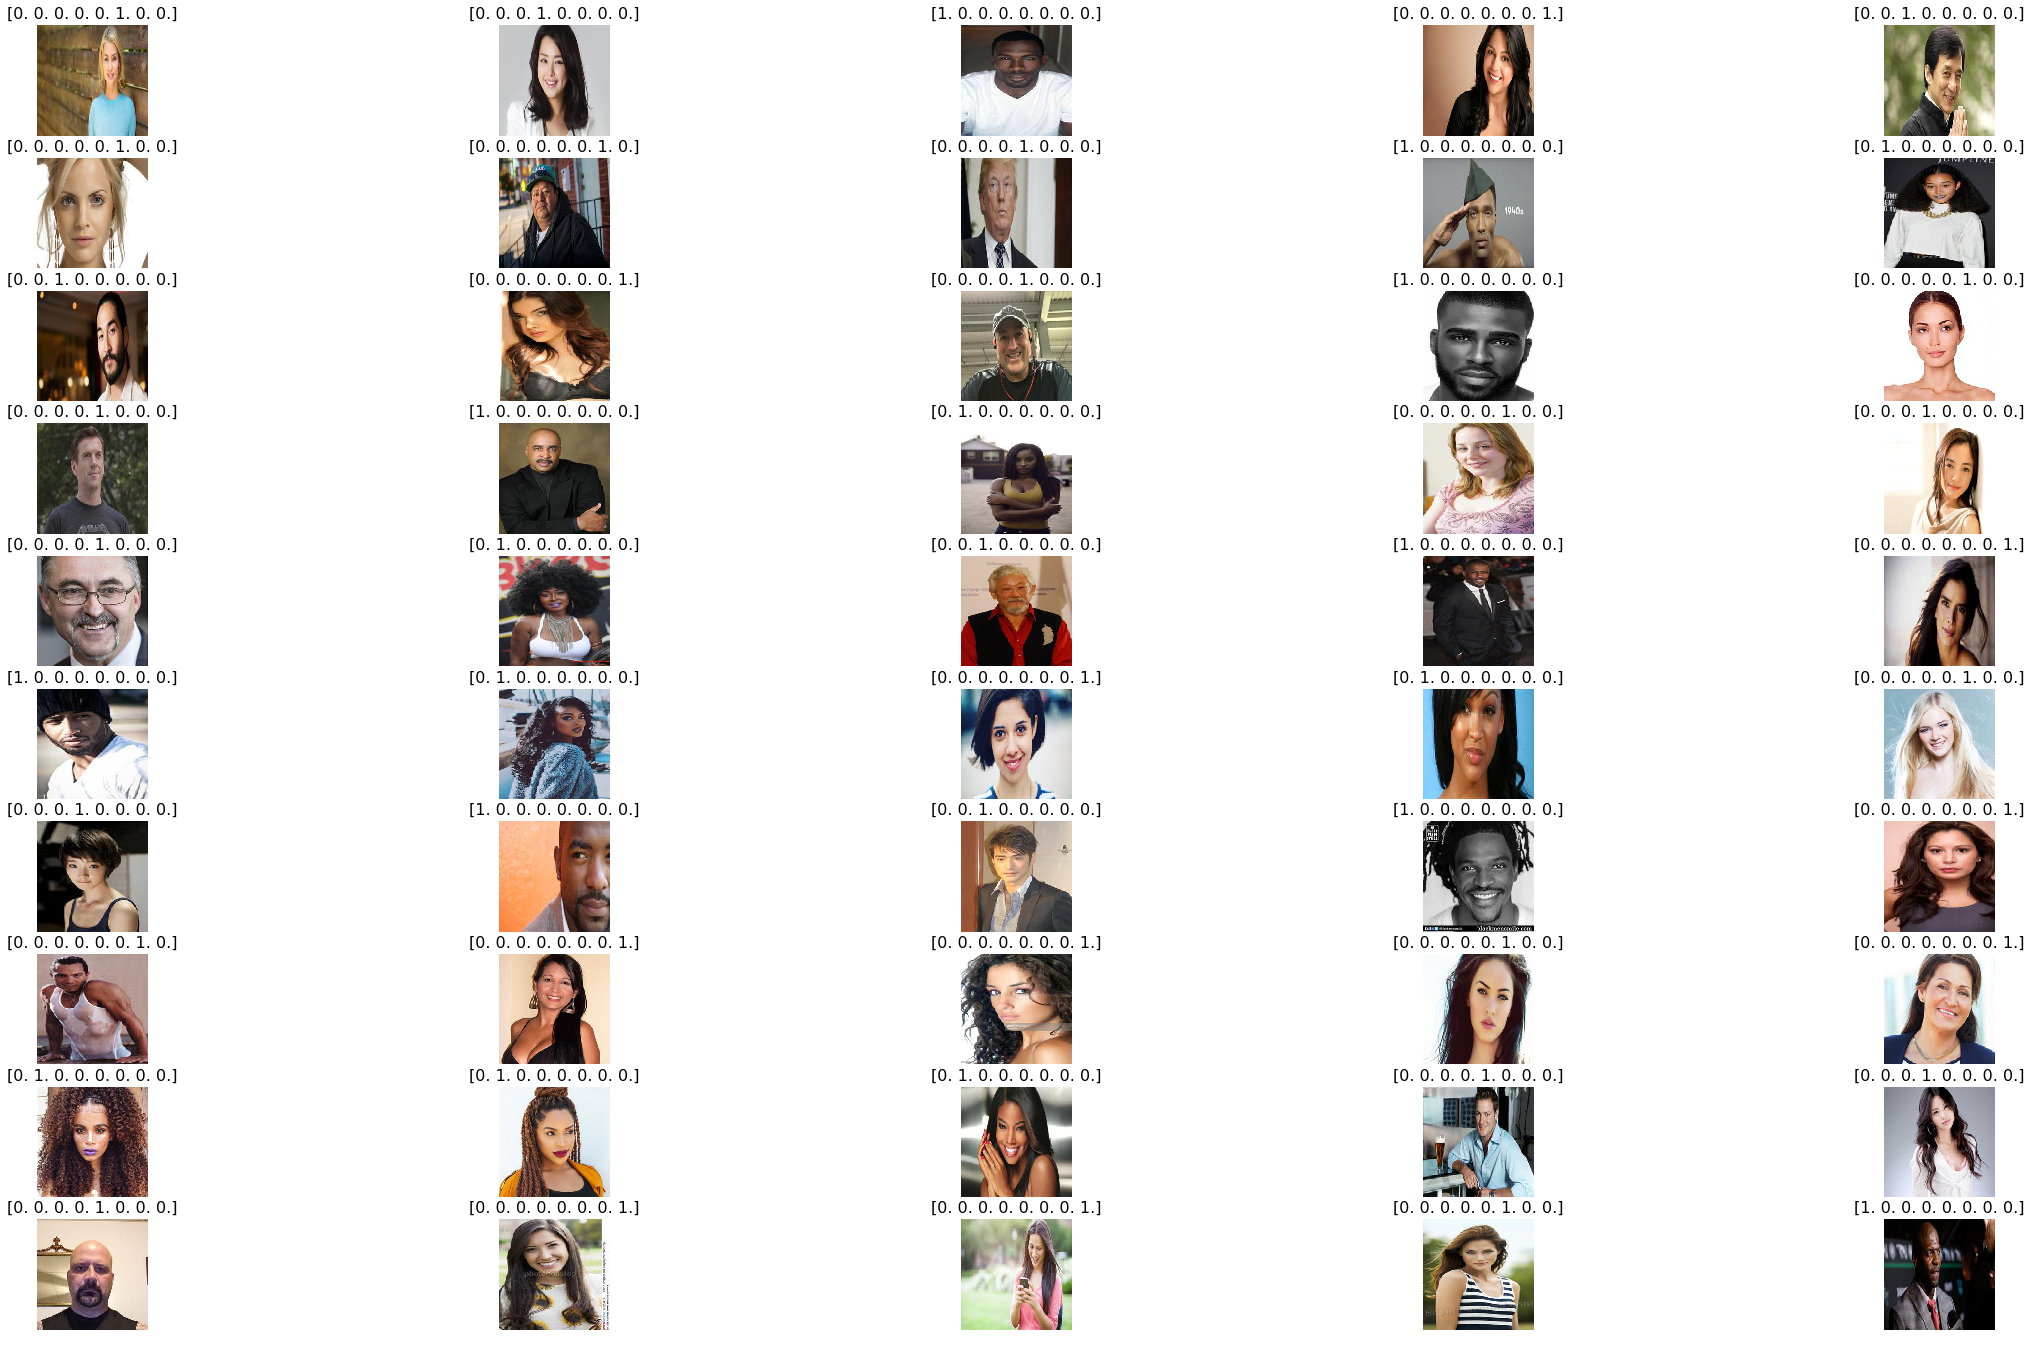

In [5]:
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

# Sequential Model Build and Training

In [6]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(8, activation='softmax'),
    ])

In [7]:
model.compile(Adam(lr=.00001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model_details = model.fit_generator(train_batches, steps_per_epoch=8, 
                    validation_data=valid_batches, validation_steps=8, epochs=5, verbose=2)

Epoch 1/5


/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1681981440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7549727230 bytes but only got 0. Skipping tag 8
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99877888 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 31197188 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3

 - 8s - loss: 13.5814 - acc: 0.1450 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 2/5
 - 8s - loss: 14.1033 - acc: 0.1250 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 3/5
 - 8s - loss: 14.1033 - acc: 0.1250 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 4/5
 - 8s - loss: 14.1033 - acc: 0.1250 - val_loss: 14.1033 - val_acc: 0.1250
Epoch 5/5
 - 8s - loss: 14.1033 - acc: 0.1250 - val_loss: 14.1033 - val_acc: 0.1250


# Sequential Model Predictions

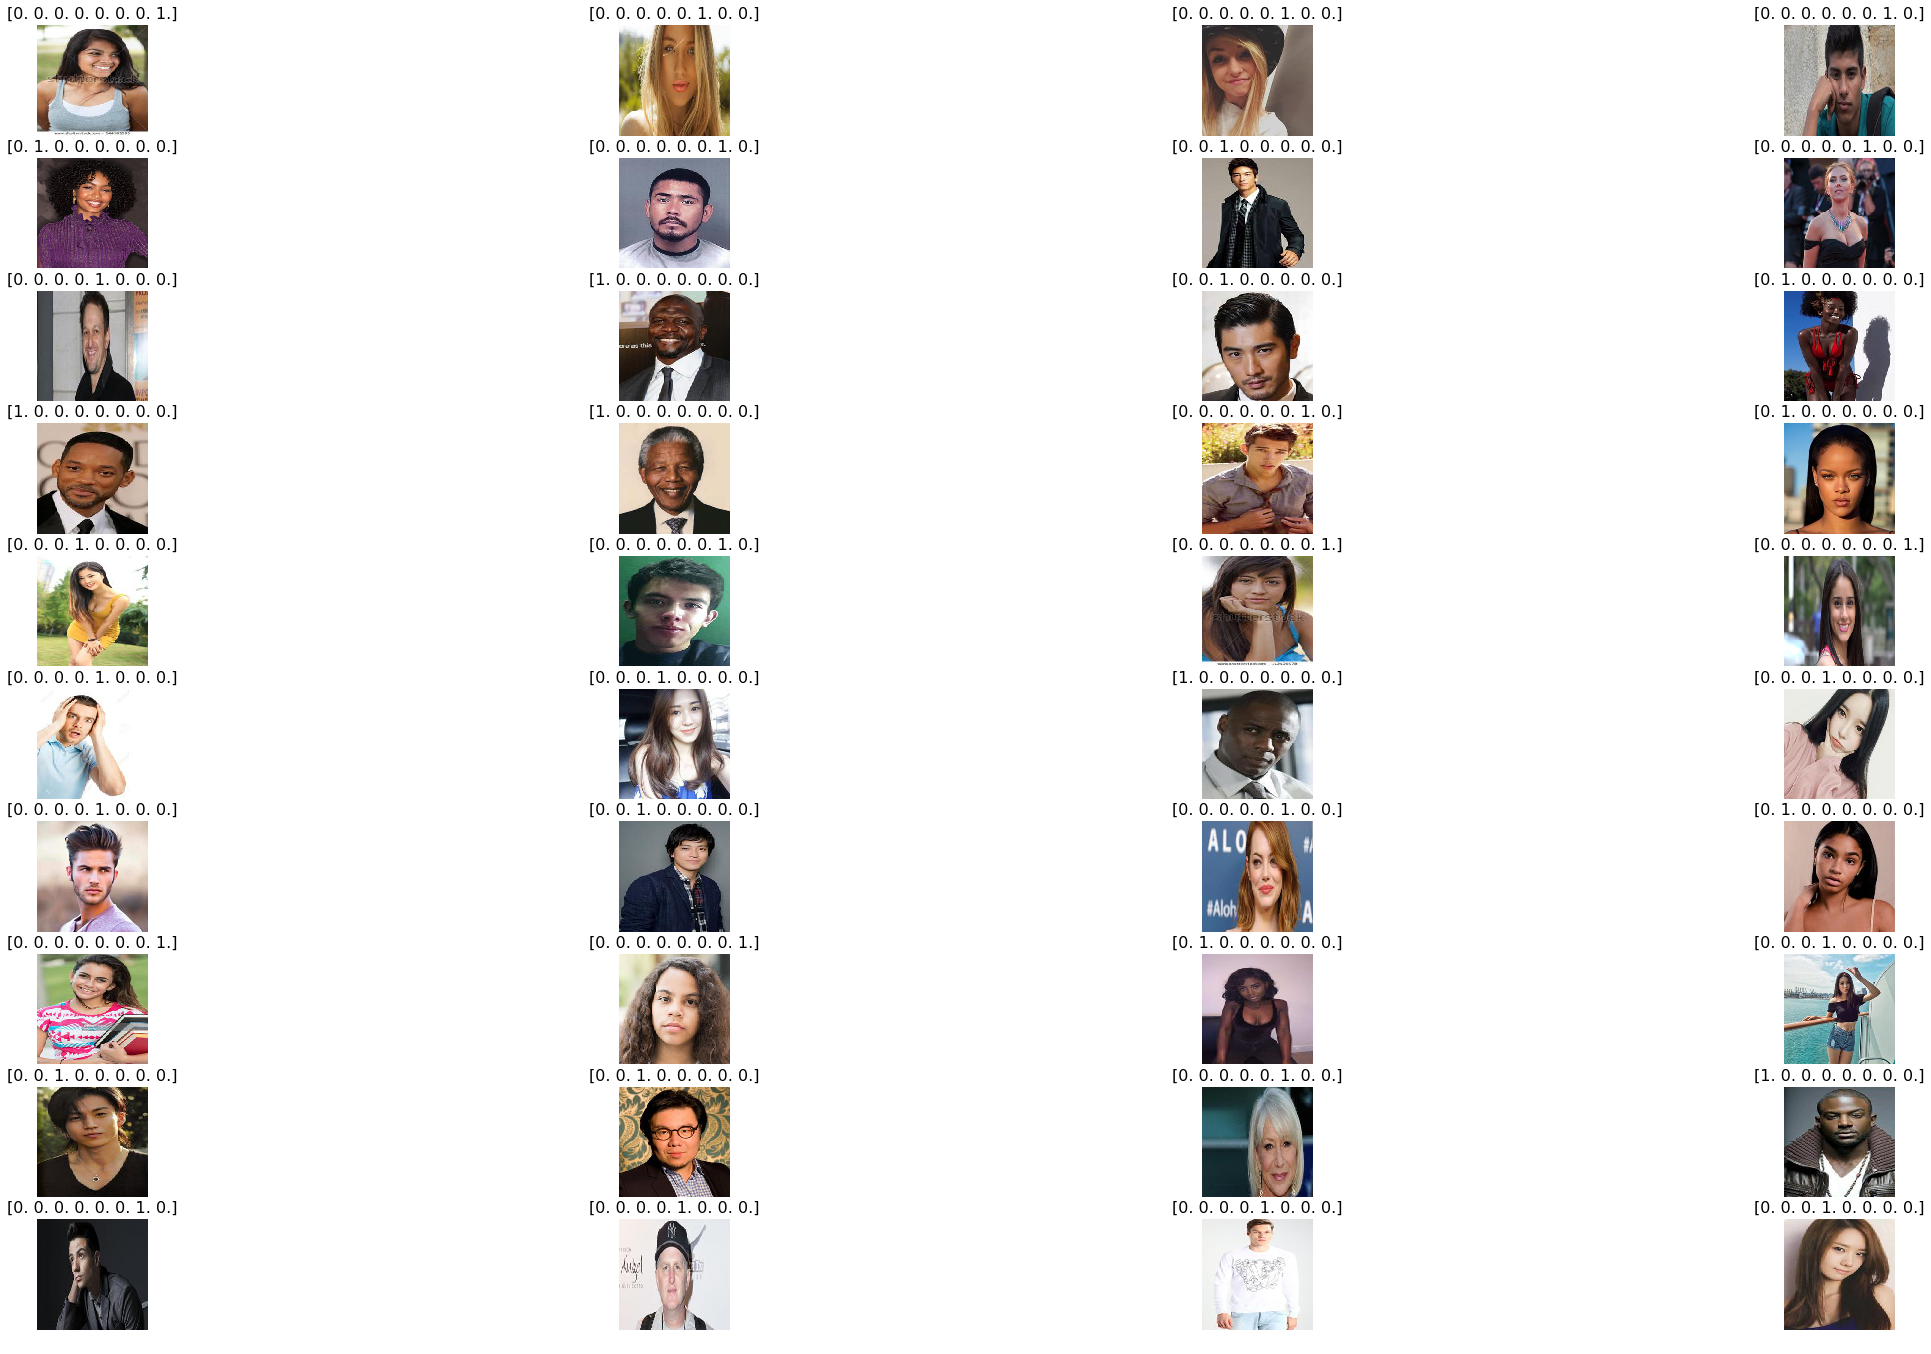

In [9]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [10]:
test_labels

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 

In [11]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [12]:
predictions

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 

# Sequential Model Results

In [13]:
def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()

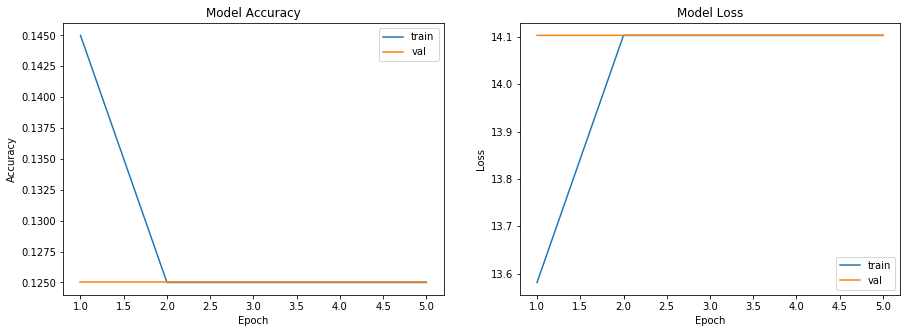

In [14]:
plot_model(model_details)

In [15]:
correctPredictions = 0

for i in range(len(predictions)):
    predArray = []
    testArray = []
    for k in range(len(predictions[i])):
        predArray.append(predictions[i][k])
        testArray.append(test_labels[i][k])
    if predArray == testArray:
        correctPredictions = correctPredictions + 1
    else:
        None

In [16]:
predictionAccuracy = correctPredictions/len(predictions)
predictionAccuracy = predictionAccuracy * 100
predictionAccuracy = np.around(predictionAccuracy, decimals=2)

print ("The sequential model had an accuracy rating of ", predictionAccuracy, "%")

The sequential model had an accuracy rating of  12.5 %


# VGG16 Model Build and Fine-tuning

In [17]:
vgg16_model = keras.applications.vgg16.VGG16()

In [18]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
type(vgg16_model)

keras.engine.training.Model

In [20]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
model.layers.pop()

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
for layer in model.layers:
    layer.trainable = False

In [25]:
model.add(Dense(8, activation='softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# VGG16 Model Training

In [27]:
model.compile(Adam(lr=.00001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model_details = model.fit_generator(train_batches, steps_per_epoch=8, 
                    validation_data=valid_batches, validation_steps=8, epochs=15, verbose=2)

Epoch 1/15


/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1681981440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7549727230 bytes but only got 0. Skipping tag 8
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99877888 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 31197188 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3

 - 90s - loss: 2.0787 - acc: 0.1100 - val_loss: 2.0786 - val_acc: 0.1450
Epoch 2/15
 - 88s - loss: 2.0777 - acc: 0.1150 - val_loss: 2.0781 - val_acc: 0.1450
Epoch 3/15
 - 88s - loss: 2.0768 - acc: 0.1350 - val_loss: 2.0775 - val_acc: 0.1450
Epoch 4/15
 - 88s - loss: 2.0758 - acc: 0.1450 - val_loss: 2.0770 - val_acc: 0.1550
Epoch 5/15
 - 88s - loss: 2.0749 - acc: 0.1525 - val_loss: 2.0764 - val_acc: 0.1700
Epoch 6/15
 - 88s - loss: 2.0740 - acc: 0.1775 - val_loss: 2.0758 - val_acc: 0.1750
Epoch 7/15
 - 88s - loss: 2.0731 - acc: 0.2050 - val_loss: 2.0753 - val_acc: 0.1900
Epoch 8/15
 - 88s - loss: 2.0721 - acc: 0.2225 - val_loss: 2.0747 - val_acc: 0.2050
Epoch 9/15
 - 88s - loss: 2.0712 - acc: 0.2350 - val_loss: 2.0742 - val_acc: 0.1950
Epoch 10/15
 - 88s - loss: 2.0703 - acc: 0.2550 - val_loss: 2.0737 - val_acc: 0.1850
Epoch 11/15
 - 88s - loss: 2.0694 - acc: 0.2575 - val_loss: 2.0731 - val_acc: 0.1800
Epoch 12/15
 - 88s - loss: 2.0685 - acc: 0.2825 - val_loss: 2.0726 - val_acc: 0.1750


# VGG16 Model Predictions

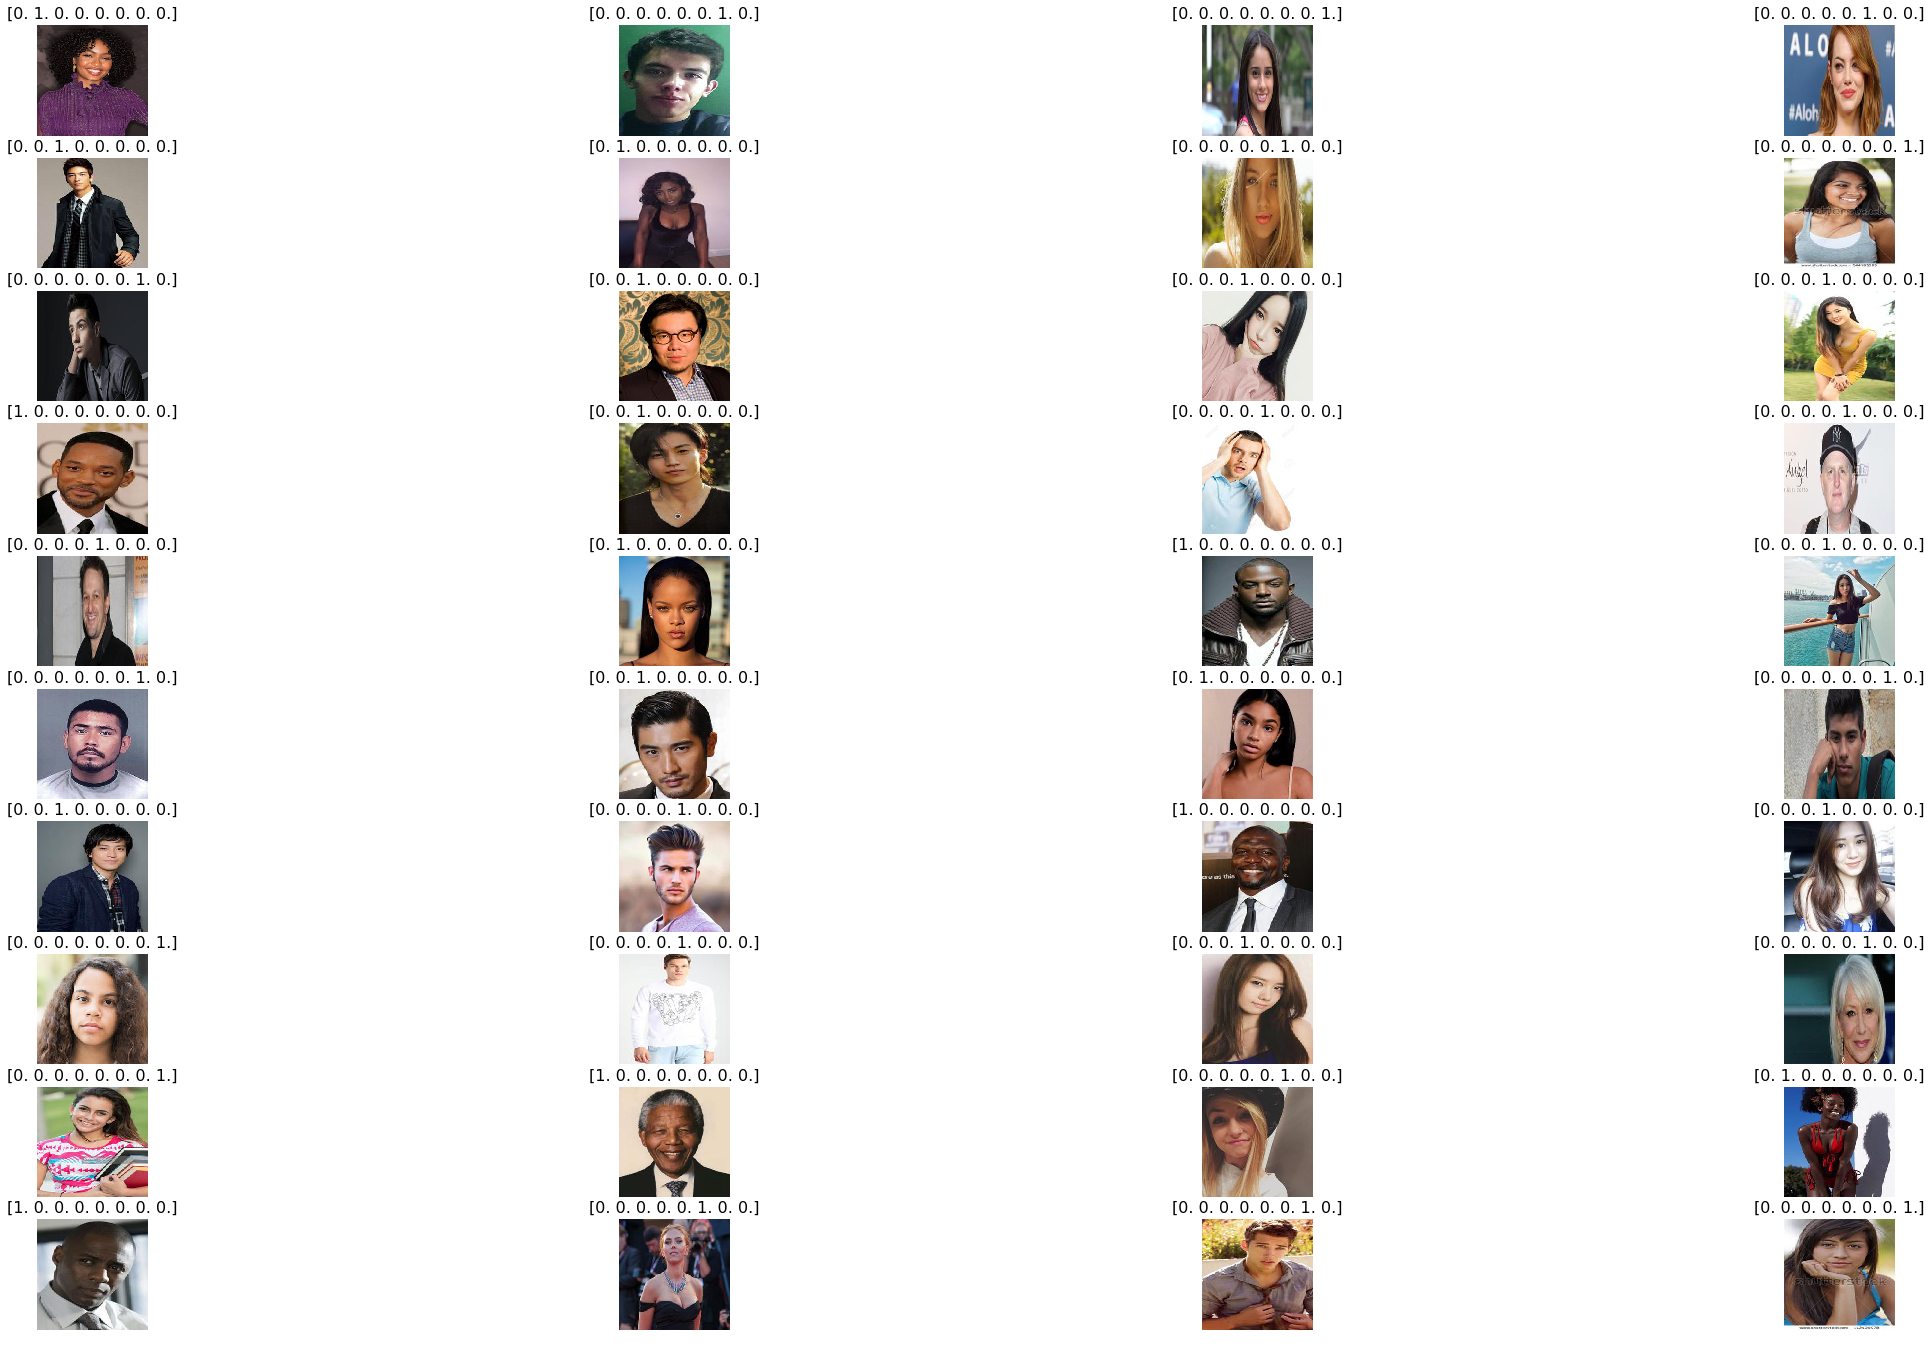

In [29]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [30]:
test_labels

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 

In [31]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [32]:
predictions

array([[0.11770019, 0.12681447, 0.1231869 , 0.12778543, 0.1256964 ,
        0.1206826 , 0.12802611, 0.13010791],
       [0.12990859, 0.125648  , 0.12672126, 0.12360757, 0.12478787,
        0.12530999, 0.12457686, 0.11943985],
       [0.1214873 , 0.12712933, 0.1221397 , 0.12610975, 0.1252036 ,
        0.12635604, 0.12409891, 0.12747541],
       [0.11812953, 0.12835811, 0.12527019, 0.12683068, 0.11959948,
        0.12802675, 0.12632889, 0.12745634],
       [0.11839096, 0.12186353, 0.1265891 , 0.13121171, 0.12299751,
        0.12571804, 0.12519163, 0.12803753],
       [0.12471324, 0.12577762, 0.12185408, 0.12568639, 0.12548281,
        0.12947589, 0.12217709, 0.12483283],
       [0.12278835, 0.12595917, 0.12340724, 0.12489808, 0.1247099 ,
        0.12629351, 0.12537654, 0.12656717],
       [0.11982749, 0.1347269 , 0.126277  , 0.12821479, 0.12066316,
        0.12029313, 0.12032013, 0.12967744],
       [0.12240998, 0.12310005, 0.1261004 , 0.12775281, 0.12417606,
        0.1264347 , 0.124096

# VGG16 Model Results

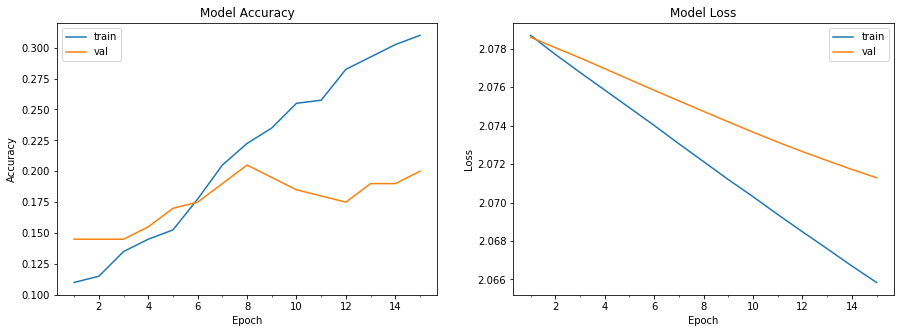

In [33]:
plot_model(model_details)

In [34]:
correctPredictions = 0

"""
for i in range(len(predictions)):
    predArray = []
    testArray = []
    maxValPred = 0
    maxValTest = 0
    for k in range(len(predictions[i])):
        if maxValPred < predictions[i][k]:
            maxValPred = predictions[i][k]
            predArray.append(predictions[i][k])
            predArray.append(k)
        if maxValTest < test_labels[i][k]:
            maxValTest = test_labels[i][k]
            testArray.append(test_labels[i][k])
            testArray.append(k)
    if predArray == testArray:
        correctPredictions = correctPredictions + 1
    else:
        None
"""

for i in range(len(predictions)):
    predVal = 0
    testVal = 0
    maxValPred = 0
    maxValTest = 0
    for k in range(len(predictions[i])):
        if maxValPred < predictions[i][k]:
            maxValPred = predictions[i][k]
            predVal = k
        if maxValTest < test_labels[i][k]:
            maxValTest = test_labels[i][k]
            testVal = k
    if predVal == testVal:
        correctPredictions = correctPredictions + 1
    else:
        None

In [35]:
predictionAccuracy = correctPredictions/len(predictions)
predictionAccuracy = predictionAccuracy * 100
predictionAccuracy = np.around(predictionAccuracy, decimals=2)

print ("The VGG16 model had an accuracy rating of ", predictionAccuracy, "%")

The VGG16 model had an accuracy rating of  17.5 %
